# Forecasting Returns in Cryptocurrency using Deep Learning  


- Calculating the daily returns, and assessing the performance of two coins Bitcoin and Ethereum.
- Finding if there is correlation between Hashrate and Bitcoin price/ Volume and Bitcoin price
- Building multiple Machine Learning Algorithm to predict future returns after feeding correlated values to the algorithm 
- Comparing which algorithm performs best in our times series forecasting returns 

In [1]:
#Importing necessary libraries
import requests as rq
import pandas as pd
import numpy as np
import datetime
import json
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

API KEY required for Bitcoin blockchain data

In [2]:
API_KEY = "GET you own private KEY from CryptoCompare.com"

### Part1
- Creating a function that inputs the coin name and the Key if required to pull hitorical coin or blockchain data from CryptoCompare's API

In [3]:
def get_bcdata_as_df(coin:str, max_past_days:int=2000, key:str=""):
    """
    """
    if key == "":
        r = rq.get(f'https://min-api.cryptocompare.com/data/v2/histoday?fsym={coin}&tsym=USD&limit={max_past_days}')
    else:
        r = rq.get(f'https://min-api.cryptocompare.com/data/blockchain/histo/day?fsym={coin}&limit={max_past_days}&api_key={key}')
    response_dict = r.json()["Data"]["Data"]
    df = pd.DataFrame.from_dict(response_dict)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df.index = df['timestamp']

    return df

- Calling Bitcoin and Ethereum and dropping redundant columns

In [4]:
BTC_df = get_bcdata_as_df("BTC")
BTC_df=BTC_df.drop(columns=['time', 'conversionType','conversionSymbol','timestamp'])
BTC_df.head()

,high,low,open,volumefrom,volumeto,close
timestamp,,,,,,
2015-12-23,444.78,434.28,437.03,63247.04,27877349.10,442.43
2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98
2015-12-25,457.44,449.52,452.98,42390.82,19251958.85,454.05
2015-12-26,456.48,400.45,454.05,208582.27,88564770.72,415.37
2015-12-27,425.51,406.09,415.37,67581.91,28259303.48,422.39


In [5]:
ETH_df = get_bcdata_as_df("ETH")
ETH_df=ETH_df.drop(columns=['time', 'conversionType','conversionSymbol','timestamp'])
ETH_df.head()

,high,low,open,volumefrom,volumeto,close
timestamp,,,,,,
2015-12-23,0.8862,0.8477,0.8671,369912.39,314718.83,0.8508
2015-12-24,0.8815,0.8430,0.8508,361534.71,309030.20,0.8548
2015-12-25,0.8750,0.8559,0.8548,154450.81,133734.84,0.8659
2015-12-26,0.8706,0.7913,0.8659,378179.27,321865.78,0.8511
2015-12-27,0.8748,0.8469,0.8511,72760.69,61927.78,0.8511


#### Part a) Calculating Daily Returns for both coins and assessing the performance 

In [6]:
def Daily_Return(df):
    returns_df = pd.DataFrame(index=df.index)
    returns_df["return"]=((df["close"]- df["open"])/df["open"])
    returns_df["cum_return"]= returns_df["return"].cumsum()
    return returns_df

In [7]:
BTC=Daily_Return(BTC_df)
ETH=Daily_Return(ETH_df)

In [8]:
Return_df=pd.merge(BTC, ETH, on='timestamp')
Return_df.columns = ['Return_BTC','Cumulative_Return_BTC','Return_ETH','Cumulative_Return_ETH' ]
Return_df.head()

,Return_BTC,Cumulative_Return_BTC,Return_ETH,Cumulative_Return_ETH
timestamp,,,,
2015-12-23,0.012356,0.012356,-0.018798,-0.018798
2015-12-24,0.023846,0.036202,0.004701,-0.014097
2015-12-25,0.002362,0.038564,0.012985,-0.001111
2015-12-26,-0.085189,-0.046625,-0.017092,-0.018203
2015-12-27,0.016901,-0.029724,0.000000,-0.018203


- The table shows the computed return and cumulative return of both coins 

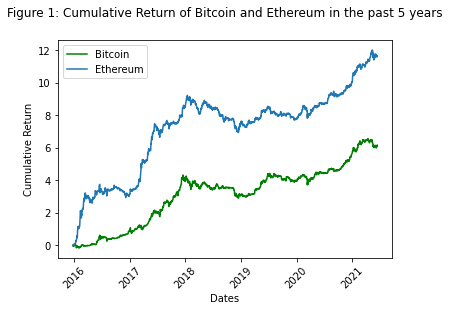

In [9]:
plt.plot(BTC.index, BTC.cum_return,color='green',label='Bitcoin')
plt.plot(ETH.index, ETH.cum_return,label='Ethereum')
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.title('Figure 1: Cumulative Return of Bitcoin and Ethereum in the past 5 years', y=1.08)
plt.xlabel('Dates')
plt.ylabel('Cumulative Return')
plt.show()

### Performance 
 The Graph in figure(1) illustrates that the coins behave in a similar pattern so predicting Bitcoin's return will allow us to predict any coins return

#### Part b) calculating the average, median and standard deviation of daily returns

- Create a Function that inputs a Coin and returns Mean, Standard Deviation and Median for the daily returns

In [10]:
def evalution(coin):
    results = {}
    results["mean"] = np.average(coin["return"])
    results["median"] = np.median(coin["return"])
    results["Standard Deviation"] = np.std(coin["return"])
    return results

In [11]:
Bitcoin=evalution(BTC)
Ethereum=evalution(ETH)
print('BTC values:')
print(Bitcoin)
print('ETH values:')
print(Ethereum)

BTC values:
{'mean': 0.0030816583936192367, 'median': 0.002231131215196425, 'Standard Deviation': 0.04063671451361539}
ETH values:
{'mean': 0.005820583575578986, 'median': 0.0008642163591072518, 'Standard Deviation': 0.06088989174271996}


### Part 2


#### Determinig what factors to include in our predictive model 

In [12]:
BC_data = get_bcdata_as_df("BTC", key=API_KEY)
BC_data = BC_data.drop(columns=['timestamp','time'])

In [13]:
BC_data.head()

,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
timestamp,,,,,,,,,,,,,,,,
2015-12-23,1182,BTC,102694003,113918292,254673,473394,221075,99734010,4948,20.304228,389888,737514.154357,9.344867e+10,544.205128,686930,1.499721e+07
2015-12-24,1182,BTC,102893207,114155882,237590,449027,210228,99944238,5351,22.284985,390026,645430.738848,9.344867e+10,621.846715,729631,1.500066e+07
2015-12-25,1182,BTC,103043770,114351370,195488,377893,180383,100124621,4135,21.694244,390188,759274.276466,9.344867e+10,528.608696,528243,1.500471e+07
2015-12-26,1182,BTC,103201860,114538696,187326,420281,179363,100303984,2963,15.051351,390359,792591.448519,9.344867e+10,506.388235,542835,1.500899e+07
2015-12-27,1182,BTC,103352286,114711155,172459,406940,160271,100464255,1008,9.031085,390564,955761.645963,9.344867e+10,419.936275,447306,1.501411e+07


In [14]:
df=pd.merge(BTC_df, BC_data, on='timestamp')
df.head()

,high,low,open,volumefrom,volumeto,close,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,...,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-23,444.78,434.28,437.03,63247.04,27877349.10,442.43,1182,BTC,102694003,113918292,...,221075,99734010,4948,20.304228,389888,737514.154357,9.344867e+10,544.205128,686930,1.499721e+07
2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98,1182,BTC,102893207,114155882,...,210228,99944238,5351,22.284985,390026,645430.738848,9.344867e+10,621.846715,729631,1.500066e+07
2015-12-25,457.44,449.52,452.98,42390.82,19251958.85,454.05,1182,BTC,103043770,114351370,...,180383,100124621,4135,21.694244,390188,759274.276466,9.344867e+10,528.608696,528243,1.500471e+07
2015-12-26,456.48,400.45,454.05,208582.27,88564770.72,415.37,1182,BTC,103201860,114538696,...,179363,100303984,2963,15.051351,390359,792591.448519,9.344867e+10,506.388235,542835,1.500899e+07
2015-12-27,425.51,406.09,415.37,67581.91,28259303.48,422.39,1182,BTC,103352286,114711155,...,160271,100464255,1008,9.031085,390564,955761.645963,9.344867e+10,419.936275,447306,1.501411e+07


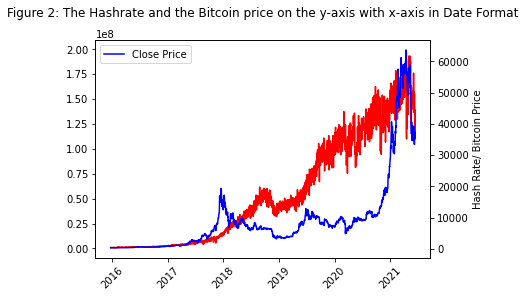

In [15]:
x=df.index

y1=df['hashrate']
y2=df['close']
fig, ax1=plt.subplots()
ax2=ax1.twinx()
curve1=ax1.plot(x,y1,label='Hashrate',color='r')
curve2=ax2.plot(x,y2,label='Close Price',color='b')
ax1.tick_params(axis='x', labelrotation = 45)
plt.legend()
plt.title('Figure 2: The Hashrate and the Bitcoin price on the y-axis with x-axis in Date Format', y=1.08)
plt.xlabel('Dates')
plt.ylabel('Hash Rate/ Bitcoin Price')
plt.plot()
plt.show()

Figure(2) shows that the correlation between the hashrate and the closing price could be noticed in a graph plot. The next step is to build a correlation matrix between the Hashrate and the closing price, and that is shown below;

In [16]:
df_co = [df["hashrate"],df["close"]]
headers = ["Hashrate", "Close Price"]
df_corr = pd.concat(df_co, axis=1, keys=headers)

In [17]:
df_corr.head()

,Hashrate,Close Price
timestamp,,
2015-12-23,737514.154357,442.43
2015-12-24,645430.738848,452.98
2015-12-25,759274.276466,454.05
2015-12-26,792591.448519,415.37
2015-12-27,955761.645963,422.39


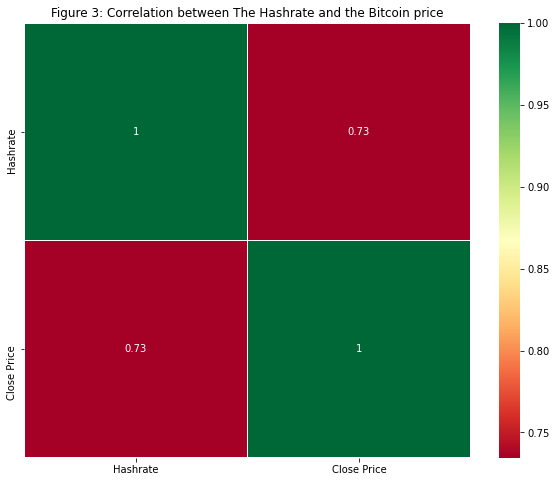

In [18]:
cor = df_corr.corr()
sns.heatmap(cor,annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('Figure 3: Correlation between The Hashrate and the Bitcoin price', y=1.08)
plt.show()

The value of 0.72 indicates a high correlation between the hashrate and the closing-price, which seems intuitive - since a hashrate corresponds to a more secure network hence higher value. The hashrate refers to the total combined computational power used to mine and process transactions on a Proof-of-Work blockchain.

hashrate is a metric for a miner's efficiency and power. A profitable Bitcoin miner must have a good hashrate to the power consumption ratio, especially with Bitcoin's ever-increasing block difficulty. The price is affected by that however it is affected by other factors to be mentioned later.

### Question 3/ Analysis Report 

In this section two resources where used to support the analysis. One is trying to find data in the API that Correlates price with other factors like Volumeto, which is the number of dollars traded (for the period) for Bitcoins, and the other resource shows the effect of 'Halving' on Bitcoin price from an external resources.

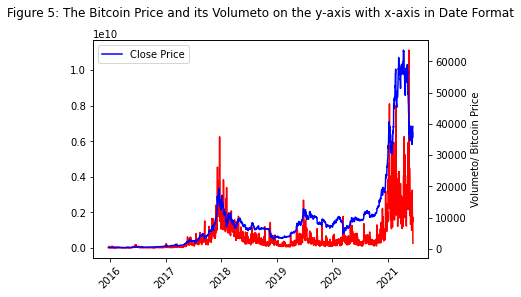

In [19]:
x=BTC_df.index
y1=BTC_df['volumeto']
y2=BTC_df['close']

fig, ax1=plt.subplots()
ax2=ax1.twinx()
curve1=ax1.plot(x,y1,label='Bitcoin Bought',color='r')
curve2=ax2.plot(x,y2,label='Close Price',color='b')
ax1.tick_params(axis='x', labelrotation = 45)
plt.legend()
plt.title('Figure 5: The Bitcoin Price and its Volumeto on the y-axis with x-axis in Date Format', y=1.08)
plt.xlabel('Dates')
plt.ylabel('Volumeto/ Bitcoin Price')
plt.plot()
plt.show()

 
- Based on Figure(5), a trend can be observed between the Volumeto and the price. They are positively correlated. This can be explained by the basic economic principle of supply and demand, Volumeto being the number of dollars traded for Bitcoins (demand), the price goes up considering there is a limited supply of Bitcoin.


### Part 3 

##### Building various machine learning algorithms to predict which has the better accuracy for our model 

### 1-Lasso

In [20]:
df=pd.read_csv('BTCUSDT_5_min_may.csv')

In [21]:
df_1 = df[['1512086400000','9889.95000000.1','18.83778600','148']]
df_1.columns = ['Unix timestamp','Close', 'Volume','Number of trades']
df_1

,Unix timestamp,Close,Volume,Number of trades
0,1512086700000,9880.05,18.657750,163
1,1512087000000,9894.96,18.854311,98
2,1512087300000,9871.44,22.392083,112
3,1512087600000,9828.89,24.735934,152
4,1512087900000,9800.00,32.337984,191
...,...,...,...,...
358419,1620069900000,57540.07,137.526668,5387
358420,1620070200000,57544.54,144.666322,5606
358421,1620070500000,57544.92,136.014959,5459
358422,1620070800000,57538.69,109.809575,5256


In [22]:
df_final=pd.concat([df_1, df_1['Close'].shift(1), df_1['Close'].shift(2),df_1['Volume'].shift(1),df_1['Volume'].shift(2)], axis=1).dropna()
df_final.columns = ['Unix timestamp','Close', 'Volume','Number of trades','Close_lag1','Close_lag2','Volume_lag1','Volume_lag2']
df_final

,Unix timestamp,Close,Volume,Number of trades,Close_lag1,Close_lag2,Volume_lag1,Volume_lag2
2,1512087300000,9871.44,22.392083,112,9894.96,9880.05,18.854311,18.657750
3,1512087600000,9828.89,24.735934,152,9871.44,9894.96,22.392083,18.854311
4,1512087900000,9800.00,32.337984,191,9828.89,9871.44,24.735934,22.392083
5,1512088200000,9829.01,23.325927,86,9800.00,9828.89,32.337984,24.735934
6,1512088500000,9844.45,9.019280,56,9829.01,9800.00,23.325927,32.337984
...,...,...,...,...,...,...,...,...
358419,1620069900000,57540.07,137.526668,5387,57496.61,57463.68,131.838090,248.806360
358420,1620070200000,57544.54,144.666322,5606,57540.07,57496.61,137.526668,131.838090
358421,1620070500000,57544.92,136.014959,5459,57544.54,57540.07,144.666322,137.526668
358422,1620070800000,57538.69,109.809575,5256,57544.92,57544.54,136.014959,144.666322


In [23]:
# splitting the the results from the variables and defining x and y
features = df_final.loc[:,'Number of trades':].values
outcome  = df_final.loc[:,'Close'].values

## Lasso Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
# splitting the the results from the variables and defining x and y
features = df_final.loc[:,'Number of trades':].values
outcome  = df_final.loc[:,'Close'].values
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.5, random_state=0)
lasso_alphas = np.logspace(-5, 0.2, 21)
cv = 5

lasso = LassoCV(alphas = lasso_alphas, cv = cv)
lasso_model = lasso.fit(X_train, y_train)
lasso_model
y_pred_test= lasso_model.predict(X_test)

In [25]:
lasso_model.alpha_

1e-05

In [26]:
result_lasso=pd.DataFrame({'y_true':y_test,'y_predict':y_pred_test})

In [27]:
result_lasso['y_predict']=(result_lasso['y_predict']/result_lasso['y_predict'].shift(1)-1)
result_lasso['y_true']=(result_lasso['y_true']/result_lasso['y_true'].shift(1)-1)
result_lasso=result_lasso.dropna()
lasso_test_mse=mean_squared_error(result_lasso['y_true'],result_lasso['y_predict'])

#print('MSE : ', lasso_test_mse)
#mse_nn=sum((result['y_true']-result['y_predict'])**2)*288/result.shape[0]
print(f'Daily MSE of BitCoin Return Lasso-Prediction is : {lasso_test_mse*288:.5f}')

Daily MSE of BitCoin Return Lasso-Prediction is : 0.02649


# Neural Networks 

### Dataset Splitting

In [28]:
X_train=df_final.iloc[:200000,3:].values
y_train=df_final.iloc[:200000,[1]].values.flatten()
X_valid=df_final.iloc[200000:300000,3:].values
y_valid=df_final.iloc[200000:300000,[1]].values.flatten()
X_test=df_final.iloc[300000:,3:].values
y_test=df_final.iloc[300000:,[1]].values.flatten()

In [29]:
# load neural networks tools from the previous lectures

def initialize_network(layers):
    # random initialization of parameters of neural network
    pars = [] # conveniently to store parameters in a list of dictionaries
    for j in range(1,len(layers)): # loop over layers
        dictionary = {'weight' : np.random.randn(layers[j],layers[j-1])*np.sqrt(2/layers[j-1]), # he et al.
                      'bias' : np.zeros((layers[j],1))} # initialize vector b(l) of biases
        pars.append(dictionary)
    return pars

def initialize_adam(layers):
    v,s = [],[] # lists of dictionaries holding ewmas for each parameter
    for j in range(1,len(layers)): # loop over layers
        dictionary = {'weight' : np.zeros((layers[j],layers[j-1])), 
                      'bias' : np.zeros((layers[j],1))} 
        v.append(dictionary.copy())
        s.append(dictionary.copy())
    return v,s

def forward(X,pars):
    
    # make lists to store elements of the graph in memory
    Zs,Hs = [],[]
    
    # initialize inputs
    H = X.T
    
    # loop over layers
    for j in range(len(pars)):
        
        # get parameters for this layer      
        W = pars[j]['weight']
        b = pars[j]['bias']
                
        # activations and output
        Z = np.matmul(W,H) + b 
        H = Z if j+1 == len(pars) else Z*(Z>0)
         
        # save to list
        Zs.append(Z)
        Hs.append(H)
    
    return Zs,Hs

def backprop(Zs,Hs,X,y,pars,lamda=0):
    
    # setup list for gradients
    grads = []
    
    # data size
    m = X.shape[0]
    # loop over layers
    for j in range(len(pars))[::-1]:
        Z = Zs[j]
        H = Hs[j]
        W = pars[j]['weight']
                
        # get activations gradient
        dZ = (H - y) if j+1 == len(pars) else (Z > 0) * dH
        
        # get input from previous layer
        H_back = Hs[j-1] if j>0 else X.T
                
        # get parameter gradients
        dW = (np.matmul(dZ,H_back.T) + lamda * W) / m
        db = np.sum(dZ,axis=1,keepdims=True) / m
        
        # save to list
        grads.append({'weight' : dW, 'bias' : db})
        
        # move to next layer
        if j>0: 
            dH = np.matmul(W.T,dZ)
                     
    return grads[::-1]


def plot_learning_curve(lc_train,lc_val=None):
    plt.figure(figsize=(9,6))
    plt.plot(lc_train)
    if lc_val!=None: plt.plot(lc_val)
    plt.title('Learning curve')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend(['Training data','Validation data'])
    return None

def optimize_adam(X_train,y_train,
                  X_val=None,y_val=None,
                  validate = False,
                  hidden_layers = [16],
                  batch_size=128,
                  lamda=0,
                  learning_rate=1e-5,
                  n_epochs=100,
                  tol = 1e-6,
                  early_stop=True,
                  verbose=True):
        
    p = X_train.shape[1] # number of features
    layers = [p] + hidden_layers + [1]
    
    beta1, beta2, epsilon = 0.9, 0.999, 1e-7 # adam defaults, not tunable in this code
    
    # make mini batches
    Xs, ys = [], []
    j=0
    while j<len(y_train):
        start, end = j, min(j+batch_size,df_final.shape[0])
        Xs.append(X_train[start:end,:])
        ys.append(y_train[start:end])
        j+=batch_size

    pars = initialize_network(layers)
    v,s = initialize_adam(layers)
    
    c = 0 # counts parameter updates (for adam bias correction)
    lc_train, lc_val = [],[] # holds mse's for learning curve
    for i in range(0,n_epochs):

        for X_batch,y_batch in zip(Xs,ys):
            c+=1

            # forward + backward pass
            Zs, Hs = forward(X_batch,pars)
            grads = backprop(Zs,Hs,X_batch,y_batch,pars,lamda=lamda)

            #  adam updates
            for j in range(len(pars)):
                for par in ['weight','bias']:
                    v[j][par] = beta1 * v[j][par] + (1-beta1) * grads[j][par]
                    vt = v[j][par] / (1-beta1**c)
                    if (s[j][par]<0).sum() !=0:
                        raise Exception('negative number in s')
                    s[j][par] = beta2 * s[j][par] + (1-beta2) * (grads[j][par]**2)

                    st = s[j][par] / (1-beta2**c)
                    adam = vt / (np.sqrt(st)+epsilon)
                    pars[j][par] -= learning_rate * adam

        # record performance at end of each epoch            
        # training data
        Zs, Hs = forward(X_train,pars)
        mse = ((y_train - Hs[-1])**2).mean()
        lc_train.append(mse)
        if validate: 
            Zs, Hs = forward(X_val,pars)
            mse = ((y_val - Hs[-1])**2).mean()
            lc_val.append(mse)
            if verbose: print('Epoch %d, training mse = %.5f, validation mse = %.5f' % (i+1,lc_train[-1],lc_val[-1]))
        else:
            if verbose: print('Epoch %d, training mse = %.5f' % (i+1,lc_train[-1]))
        
        # stop if absolute change in loss is below tolerance 
        if i>1 and np.abs(lc_train[-1]-lc_train[-2]) < tol:
            print('Stopping: training loss improvement is below tolerance')
            break
            
        # stop if using early stopping and validation loss is increasing 
        if i>1 and validate and early_stop and lc_val[-1]>lc_val[-2]:
            print('Stopping: validation loss is rising')
            break
            
            
    if validate:        
        return pars, lc_train, lc_val 
    else:
        return pars, lc_train

### First Look at Learning Curve

Epoch 1, training mse = 8526688.77461
Epoch 2, training mse = 415744.13644
Epoch 3, training mse = 45173.66039
Epoch 4, training mse = 34852.21124
Epoch 5, training mse = 26664.93164
Epoch 6, training mse = 19865.37421
Epoch 7, training mse = 14811.89652
Epoch 8, training mse = 11393.70881
Epoch 9, training mse = 9278.54772
Epoch 10, training mse = 7991.84317
Epoch 11, training mse = 7139.81469
Epoch 12, training mse = 6487.22857
Epoch 13, training mse = 5933.68979
Epoch 14, training mse = 5451.59177
Epoch 15, training mse = 5018.89658
Epoch 16, training mse = 4640.89685
Epoch 17, training mse = 4310.97641
Epoch 18, training mse = 4019.27567
Epoch 19, training mse = 3764.71825
Epoch 20, training mse = 3546.81996
Epoch 21, training mse = 3363.30975
Epoch 22, training mse = 3206.72333
Epoch 23, training mse = 3067.63088
Epoch 24, training mse = 2948.38177
Epoch 25, training mse = 2840.40611
Epoch 26, training mse = 2741.75010
Epoch 27, training mse = 2649.32562
Epoch 28, training mse = 2

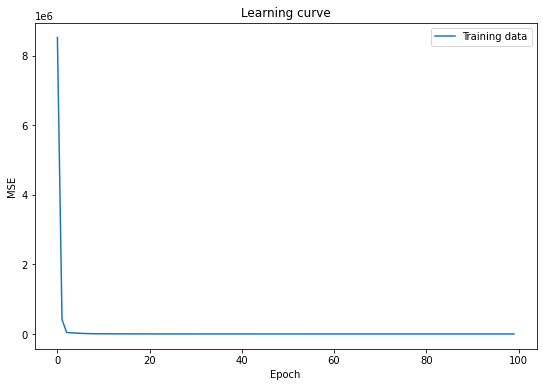

In [30]:
np.random.seed(199)
pars,lc_train = optimize_adam(X_train,y_train,
                                      hidden_layers = [32],
                                      batch_size=512,
                                      lamda=1e-5,
                                      learning_rate=1e-4,
                                      n_epochs=100)

plot_learning_curve(lc_train)

### Avoid Underfit

In [31]:
# fit an OLS predictive model as a benchmark

import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin = sm.OLS(y_train,X_train_const).fit()
yhat = lin.predict(X_train_const)
mse_lin = lin.mse_total

print('OLS model training MSE: %.5f' % mse_lin)
print('neural network training MSE: %.5f' % lc_train[-1])

OLS model training MSE: 9065018.38819
neural network training MSE: 1557.78581


### Tuning Parameters

- To test and optimise our hyperparameters we need to make use of a grid search.

- We try to find optimal hyperparameters in two/three/four hidden layers model separately. 

- The hyperparameters we want to optimise are the number of nodes in each layer and the complexity penality we use.

**Model With Two Hidden Layer**

First, we do a simple test to see how much time does it cost to do one time and one run.

In [32]:
%%timeit -r1 -n1
lamda_grid = [1e-5,1e-3, 1e-1]
np.random.seed(193)
val_losses = []
for lamda in lamda_grid:
    pars,lc_train,lc_val = optimize_adam(X_train,y_train,X_valid,y_valid,
                                      validate=True,
                                      hidden_layers = [32,16],
                                      batch_size=512,
                                      lamda=lamda,
                                      learning_rate=1e-4,
                                      n_epochs=50,
                                      verbose=True)
    val_losses.append(lc_val[-1])
    print('Lamba = %E, Validation loss = %.4f' % (lamda,lc_val[-1]))

Epoch 1, training mse = 19003383.66114, validation mse = 25106677.33814
Epoch 2, training mse = 540615.92515, validation mse = 1156918.82136
Epoch 3, training mse = 29179.78620, validation mse = 458658.60938
Epoch 4, training mse = 23568.44634, validation mse = 333653.39928
Epoch 5, training mse = 18696.32048, validation mse = 218580.49330
Epoch 6, training mse = 15568.89871, validation mse = 164440.65048
Epoch 7, training mse = 14039.39358, validation mse = 135195.38656
Epoch 8, training mse = 12348.69515, validation mse = 113400.02977
Epoch 9, training mse = 10888.96506, validation mse = 95530.87700
Epoch 10, training mse = 8916.66289, validation mse = 78904.69055
Epoch 11, training mse = 7213.75793, validation mse = 62726.58112
Epoch 12, training mse = 6829.62596, validation mse = 52079.35639
Epoch 13, training mse = 5532.43998, validation mse = 44248.84851
Epoch 14, training mse = 5028.66549, validation mse = 37116.18954
Epoch 15, training mse = 4526.84361, validation mse = 31140.8

We use node-choosing method:in the last layer, we have 1, 4, 9, 16, 25 nodes.

In [33]:
lamda_grid = [1e-5,1e-3, 1e-1, 10] # We search best lambda in this four numbers
best_result1 = []
for lamda in lamda_grid:
    loss1=100000
    node_record=2
    for node in range(1,6):
        np.random.seed(193) # to keep result comparable, choose same seed in each run
        pars,lc_train,lc_val = optimize_adam(X_train,y_train,X_valid,y_valid,
                                          validate=True,
                                          hidden_layers = [node**2*2,node**2],
                                          batch_size=512,
                                          lamda=lamda,
                                          learning_rate=1e-4,
                                          n_epochs=50,
                                          verbose=True)
        if loss1>lc_val[-1]:
            loss1=lc_val[-1]
            node_record=node
        print('Lamba = %E, Validation loss = %.4f' % (lamda,lc_val[-1]))
        # save best result in tuple form lambda, node in last layer,mse
    best_result1.append((lamda,node_record**2,loss1))

Epoch 1, training mse = 68793946.19111, validation mse = 83484694.47565
Epoch 2, training mse = 68766621.38126, validation mse = 83373568.43601
Epoch 3, training mse = 68722018.78112, validation mse = 83192842.92055
Epoch 4, training mse = 68635483.02379, validation mse = 82819162.38339
Epoch 5, training mse = 68440098.91476, validation mse = 81905237.10955
Epoch 6, training mse = 67855448.47910, validation mse = 79068899.09002
Epoch 7, training mse = 62911769.25714, validation mse = 65094792.86142
Epoch 8, training mse = 43518204.88073, validation mse = 42268480.30199
Epoch 9, training mse = 28722432.97327, validation mse = 28127181.51192
Epoch 10, training mse = 18470672.52418, validation mse = 20643757.64876
Epoch 11, training mse = 11736195.74730, validation mse = 17751681.44608
Epoch 12, training mse = 7709734.02529, validation mse = 17615789.01959
Epoch 13, training mse = 5524536.46353, validation mse = 18536588.66637
Stopping: validation loss is rising
Lamba = 1.000000E-05, Vali

**Model With Three Hidden Layer**

Similarly, we use 'pyramid' networks, and number in first layer is 4, 16, 36, 64, 100 so that in last layer nodes numer is 1, 4, 9, 16, 25 separately

In [34]:
lamda_grid = [1e-5,1e-3, 1e-1,10]
best_result2 = []
for lamda in lamda_grid:
    loss1=100000
    node_record=2
    for node in range(1,6):
        np.random.seed(193)
        pars,lc_train,lc_val = optimize_adam(X_train,y_train,X_valid,y_valid,
                                          validate=True,
                                          hidden_layers = [node**2*4,node**2*2,node**2],
                                          batch_size=512,
                                          lamda=lamda,
                                          learning_rate=1e-4,
                                          n_epochs=50,
                                          verbose=True)
        if loss1>lc_val[-1]:
            loss1=lc_val[-1]
            node_record=node
        print('Lamba = %E, Validation loss = %.4f' % (lamda,lc_val[-1]))
        # save best result in tuple form lambda, node in last layer,mse
    best_result2.append((lamda,node_record**2,loss1))

Epoch 1, training mse = 128014347.80053, validation mse = 161232205.61655
Epoch 2, training mse = 113962860.18191, validation mse = 142237896.73813
Epoch 3, training mse = 103268002.07833, validation mse = 127901288.06850
Epoch 4, training mse = 95261501.22531, validation mse = 116928205.92939
Epoch 5, training mse = 89138690.30525, validation mse = 108448283.63186
Epoch 6, training mse = 84084049.42373, validation mse = 101316694.46319
Epoch 7, training mse = 79741117.87576, validation mse = 94751766.69848
Epoch 8, training mse = 74759152.06721, validation mse = 86204047.58781
Epoch 9, training mse = 69413307.74392, validation mse = 83155053.28486
Epoch 10, training mse = 68918072.56825, validation mse = 83147738.04472
Epoch 11, training mse = 68882863.38202, validation mse = 83146604.84896
Epoch 12, training mse = 68882223.03113, validation mse = 83145948.99227
Epoch 13, training mse = 68881612.74503, validation mse = 83145289.39772
Epoch 14, training mse = 68881025.04165, validation

**Model With Four Hidden Layer**

As number of layer increases, if we continue to use node-choosing method.And in the last layer, we have 1, 4, 9, 16, 25 nodes.

In [35]:
lamda_grid = [1e-5,1e-3, 1e-1, 10]
best_result3 = []
for lamda in lamda_grid:
    loss1=100000
    node_record=2
    for node in range(1,6):
        np.random.seed(193)
        pars,lc_train,lc_val = optimize_adam(X_train,y_train,X_valid,y_valid,
                                          validate=True,
                                          hidden_layers = [node*8,node*4,node*2,node],
                                          batch_size=512,
                                          lamda=lamda,
                                          learning_rate=1e-4,
                                          n_epochs=50,
                                          verbose=True)
        if loss1>lc_val[-1]:
            loss1=lc_val[-1]
            node_record=node
        print('Lamba = %E, Validation loss = %.4f' % (lamda,lc_val[-1]))
        # save best result in tuple form lambda, node in last layer,mse
    best_result3.append((lamda,node_record,loss1))

Epoch 1, training mse = 68887819.05887, validation mse = 83151673.28826
Epoch 2, training mse = 68887266.73463, validation mse = 83151031.74633
Epoch 3, training mse = 68886708.38698, validation mse = 83150383.20759
Epoch 4, training mse = 68886147.85118, validation mse = 83149732.12683
Epoch 5, training mse = 68885586.24875, validation mse = 83149079.80672
Epoch 6, training mse = 68885024.05265, validation mse = 83148426.79662
Epoch 7, training mse = 68884461.50175, validation mse = 83147773.37397
Epoch 8, training mse = 68883898.72989, validation mse = 83147119.69424
Epoch 9, training mse = 68883335.81706, validation mse = 83146465.85035
Epoch 10, training mse = 68882772.81311, validation mse = 83145811.90018
Epoch 11, training mse = 68882209.74992, validation mse = 83145157.88078
Epoch 12, training mse = 68881646.64828, validation mse = 83144503.81629
Epoch 13, training mse = 68881083.52190, validation mse = 83143849.72263
Epoch 14, training mse = 68880520.37989, validation mse = 83

### Result Summary

In [36]:
# Transform mse results to R2
mse_1=list(map(lambda x:x[2],best_result1))
mse_2=list(map(lambda x:x[2],best_result2))
mse_3=list(map(lambda x:x[2],best_result3))
mse=pd.DataFrame([mse_1,mse_2,mse_3])
mse=mse.T
mse.columns=['NN2','NN3','NN4']
mse.index=['1e-5','1e-3','1e-1','10']
mse

,NN2,NN3,NN4
1e-5,1080.209763,1284.678636,4837.157098
1e-3,1008.001701,1242.761888,1999.256490
1e-1,968.410027,1240.214512,1785.363862
10,1176.722981,1233.649086,2419.894307


In [37]:
best_result1

[(1e-05, 25, 1080.2097625783986),
 (0.001, 25, 1008.0017008929705),
 (0.1, 25, 968.4100271771041),
 (10, 25, 1176.722980898705)]

The best result is when choosing lambda=1e-3, with two layers and 18,9 nodes in each layer.

## Showing best result

Epoch 1, training mse = 66225.46045, validation mse = 114718.87386
Epoch 2, training mse = 17873.83814, validation mse = 36729.54030
Epoch 3, training mse = 7058.44809, validation mse = 21587.67482
Epoch 4, training mse = 4307.35591, validation mse = 14776.61241
Epoch 5, training mse = 3392.49288, validation mse = 11226.71833
Epoch 6, training mse = 2889.36061, validation mse = 9278.31115
Epoch 7, training mse = 2503.68259, validation mse = 8056.55907
Epoch 8, training mse = 2209.13950, validation mse = 7059.64359
Epoch 9, training mse = 2002.30343, validation mse = 6206.34148
Epoch 10, training mse = 1858.62757, validation mse = 5565.44412
Epoch 11, training mse = 1763.83435, validation mse = 5065.65262
Epoch 12, training mse = 1674.56233, validation mse = 4579.44873
Epoch 13, training mse = 1603.03742, validation mse = 4163.80377
Epoch 14, training mse = 1513.65121, validation mse = 3799.49698
Epoch 15, training mse = 1444.36202, validation mse = 3462.96068
Epoch 16, training mse = 1

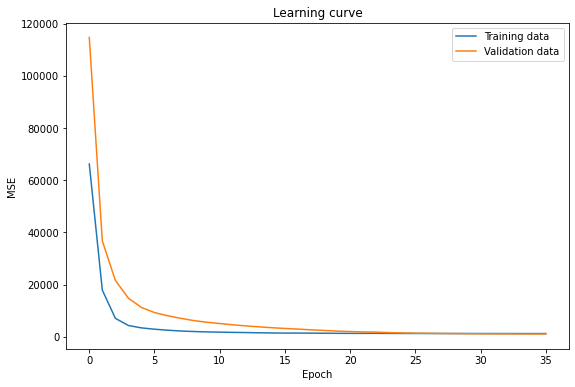

In [38]:
np.random.seed(199)
pars,lc_train,lc_validate = optimize_adam(X_train,y_train,X_valid,y_valid,
                                      validate=True,
                                      hidden_layers = [50,25],
                                      batch_size=512,
                                      lamda=1e-3,
                                      learning_rate=1e-4,
                                      n_epochs=100)

plot_learning_curve(lc_train,lc_validate)

In [39]:
nn_result=forward(X_test,pars)
result_nn=pd.DataFrame({'y_predict':nn_result[-1][-1].flatten(),'y_true':y_test})

In [40]:
result_nn

,y_predict,y_true
0,11375.581006,11390.69
1,11380.162918,11383.72
2,11377.952078,11380.58
3,11371.523421,11380.00
4,11369.689649,11379.34
...,...,...
58417,57426.442325,57540.07
58418,57465.365139,57544.54
58419,57481.984591,57544.92
58420,57483.454965,57538.69


<Figure size 1728x1152 with 0 Axes>

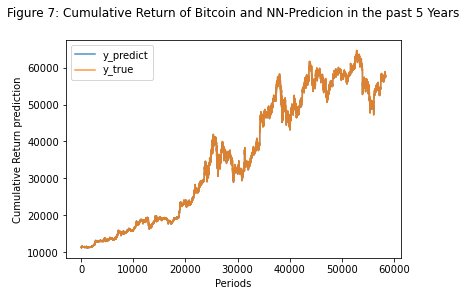

In [41]:
plt.figure(figsize=(24,16))
result_nn.plot(alpha=0.8)
plt.legend(loc="upper left")
plt.title('Figure 7: Cumulative Return of Bitcoin and NN-Predicion in the past 5 Years', y=1.08)
plt.xlabel('Periods')
plt.ylabel('Cumulative Return prediction')
plt.show()

In [42]:
nn_result=forward(X_test,pars)

In [43]:
result=pd.DataFrame({'y_true':y_test,'y_predict':nn_result[-1][-1].flatten()})
result['y_predict']=(result['y_predict']/result['y_predict'].shift(13)-1)
result['y_true']=(result['y_true']/result['y_true'].shift(1)-1)
result=result.dropna()

In [44]:
mse_nn=sum((result['y_true']-result['y_predict'])**2)*288/result.shape[0]
print(f'Daily MSE of BitCoin Return NN-Prediction is : {mse_nn:.5f}')

Daily MSE of BitCoin Return NN-Prediction is : 0.02957
